In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### pour installer tensorflow
voir les instructions données ici : https://github.com/jeffheaton/t81_558_deep_learning/tree/master/install
liste des versions de tensorflow dans les différents channels : https://anaconda.org/search?q=tensorflow
liste des versions de tensorflow officielles : https://www.tensorflow.org/install/source#tested_build_configurations
avec tensorflow 2.11, il faut installer keras 2.3.1 et un python 3.7 à 3.10

### documentation
Keras : https://keras.io/

In [3]:
# Multilayer perceptron Neural Network
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.utils.vis_utils import plot_model
from keras.layers import Dropout
from keras.utils import np_utils

In [4]:
titanic = pd.read_csv("/content/drive/MyDrive/Analyse_donnees/titanic.csv")

In [5]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [6]:
titanic['Sex']=titanic['Sex'].map({'male':0,'female':1})
titanic['Embarked']=titanic['Embarked'].map({'S':0,'C':1,'Q':2})
titanic.dropna(subset=features,how="any",inplace=True)

In [7]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,NaN,2.0
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


In [9]:
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                96        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


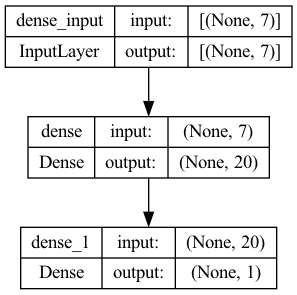

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

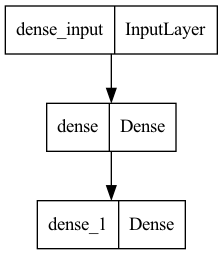

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=False, show_layer_names=True)

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True, draw_volume=True).show()

ModuleNotFoundError: No module named 'visualkeras'

In [11]:
##### Réglage des paramètres d'apprentissage : (voir https://keras.io/api/optimizers/)
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
def plot():
    plt.figure(figsize=(17,14))
    plt.rc('font', size=14)
    plt.ylim(0.5,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.figure(figsize=(17,14))
    plt.rc('font', size=14)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic[features], titanic['Survived'], random_state=0)

In [14]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=10, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/30
54/54 [==============================] - 2s 10ms/step - loss: 4.5233 - accuracy: 0.5094 - val_loss: 0.8457 - val_accuracy: 0.6742
Epoch 2/30
54/54 [==============================] - 0s 3ms/step - loss: 0.7718 - accuracy: 0.6816 - val_loss: 0.6610 - val_accuracy: 0.6742
Epoch 3/30
54/54 [==============================] - 0s 4ms/step - loss: 0.6276 - accuracy: 0.6966 - val_loss: 0.6194 - val_accuracy: 0.6910
Epoch 4/30
54/54 [==============================] - 0s 4ms/step - loss: 0.5716 - accuracy: 0.7079 - val_loss: 0.6306 - val_accuracy: 0.6854
Epoch 5/30
54/54 [==============================] - 0s 4ms/step - loss: 0.5743 - accuracy: 0.7247 - val_loss: 0.6700 - val_accuracy: 0.6910
Epoch 6/30
54/54 [==============================] - 0s 4ms/step - loss: 0.5865 - accuracy: 0.7135 - val_loss: 0.6373 - val_accuracy: 0.7079
Epoch 7/30
54/54 [==============================] - 0s 3ms/step - loss: 0.6069 - accuracy: 0.7247 - val_loss: 0.6175 - val_accuracy: 0.7303
Epoch 8/30
54/54 [=

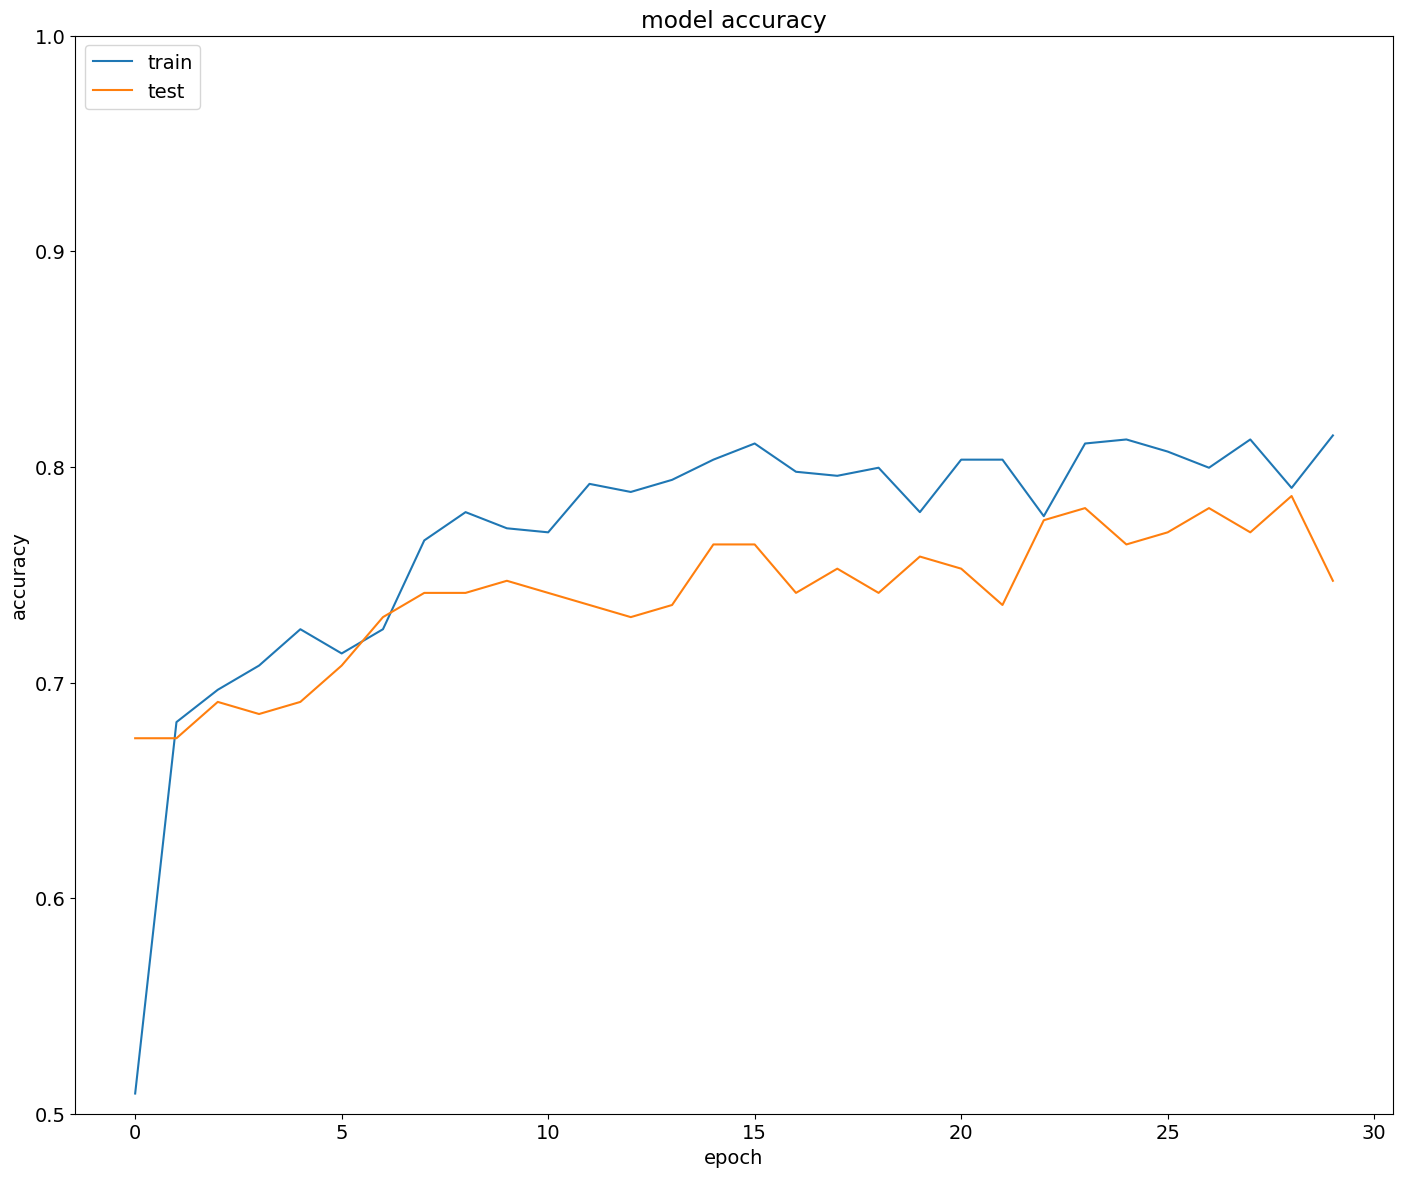

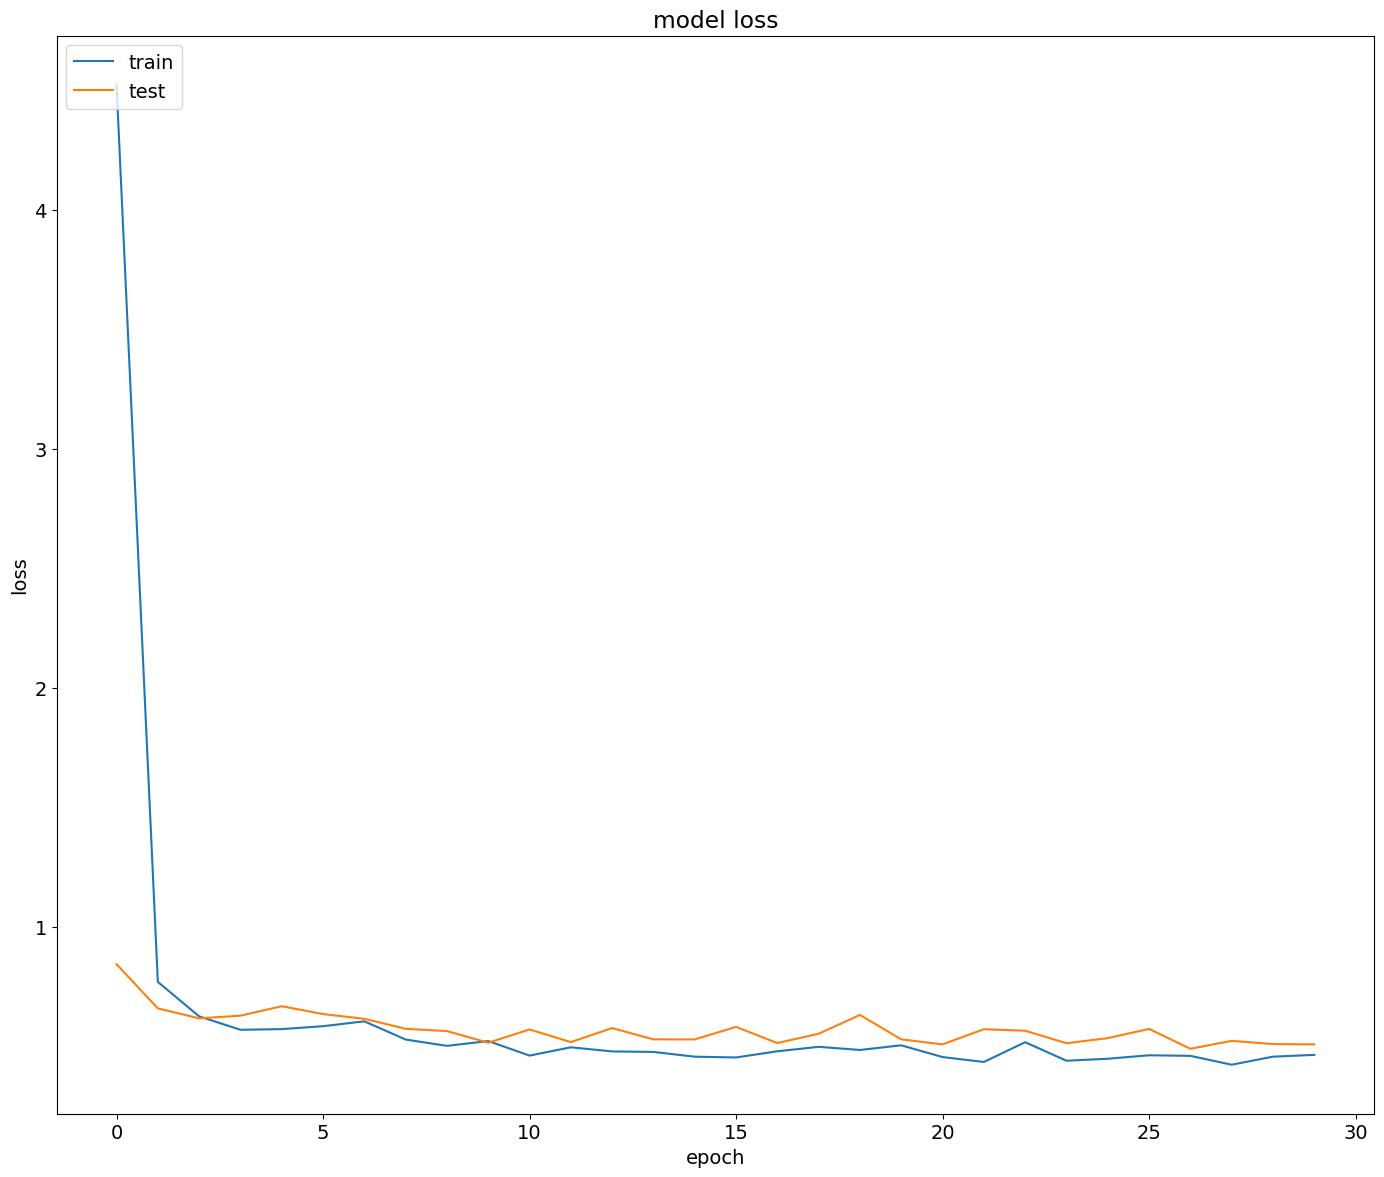

In [15]:
plot()

### Normalisation des données

In [ ]:
X_titanic_scaled = titanic[features]
scaler = MinMaxScaler()
X_titanic_scaled = scaler.fit_transform(X_titanic_scaled)
X_titanic_scaled = pd.DataFrame(X_titanic_scaled, columns=features)

In [ ]:
X_titanic_scaled

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_titanic_scaled, titanic['Survived'], random_state=0)

In [ ]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_data=(X_test, Y_test), verbose=1)

In [ ]:
plot()

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=350, validation_data=(X_test, Y_test), verbose=1)

In [ ]:
plot()

In [ ]:
X_titanic_scaled = titanic[features]
scaler = StandardScaler()
X_titanic_scaled = scaler.fit_transform(X_titanic_scaled)
X_titanic_scaled = pd.DataFrame(X_titanic_scaled, columns=features)

In [ ]:
X_titanic_scaled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.908600,-0.756138,-0.527669,0.522511,-0.506787,-0.516380,-0.501226
1,-1.482983,1.322511,0.577094,0.522511,-0.506787,0.694046,1.417445
2,0.908600,1.322511,-0.251478,-0.552714,-0.506787,-0.503620,-0.501226
3,-1.482983,1.322511,0.369951,0.522511,-0.506787,0.350326,-0.501226
4,0.908600,-0.756138,0.369951,-0.552714,-0.506787,-0.501257,-0.501226
...,...,...,...,...,...,...,...
707,0.908600,1.322511,0.646142,-0.552714,5.350885,-0.102875,3.336115
708,-0.287191,-0.756138,-0.182430,-0.552714,-0.506787,-0.407687,-0.501226
709,-1.482983,1.322511,-0.734812,-0.552714,-0.506787,-0.086335,-0.501226
710,-1.482983,-0.756138,-0.251478,-0.552714,-0.506787,-0.086335,1.417445


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_titanic_scaled, titanic['Survived'], random_state=0)

In [ ]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.7828 - val_loss: 0.4826 - val_accuracy: 0.7640
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.8034 - val_loss: 0.4769 - val_accuracy: 0.7865
Epoch 3/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8258 - val_loss: 0.4817 - val_accuracy: 0.7921
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8390 - val_loss: 0.4759 - val_accuracy: 0.8090
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8315 - val_loss: 0.4687 - val_accuracy: 0.8146
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8390 - val_loss: 0.4697 - val_accuracy: 0.8090
Epoch 7/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8446 - val_loss: 0.4682 - val_accuracy: 0.8202
Epoch 8/50
54/54 [==

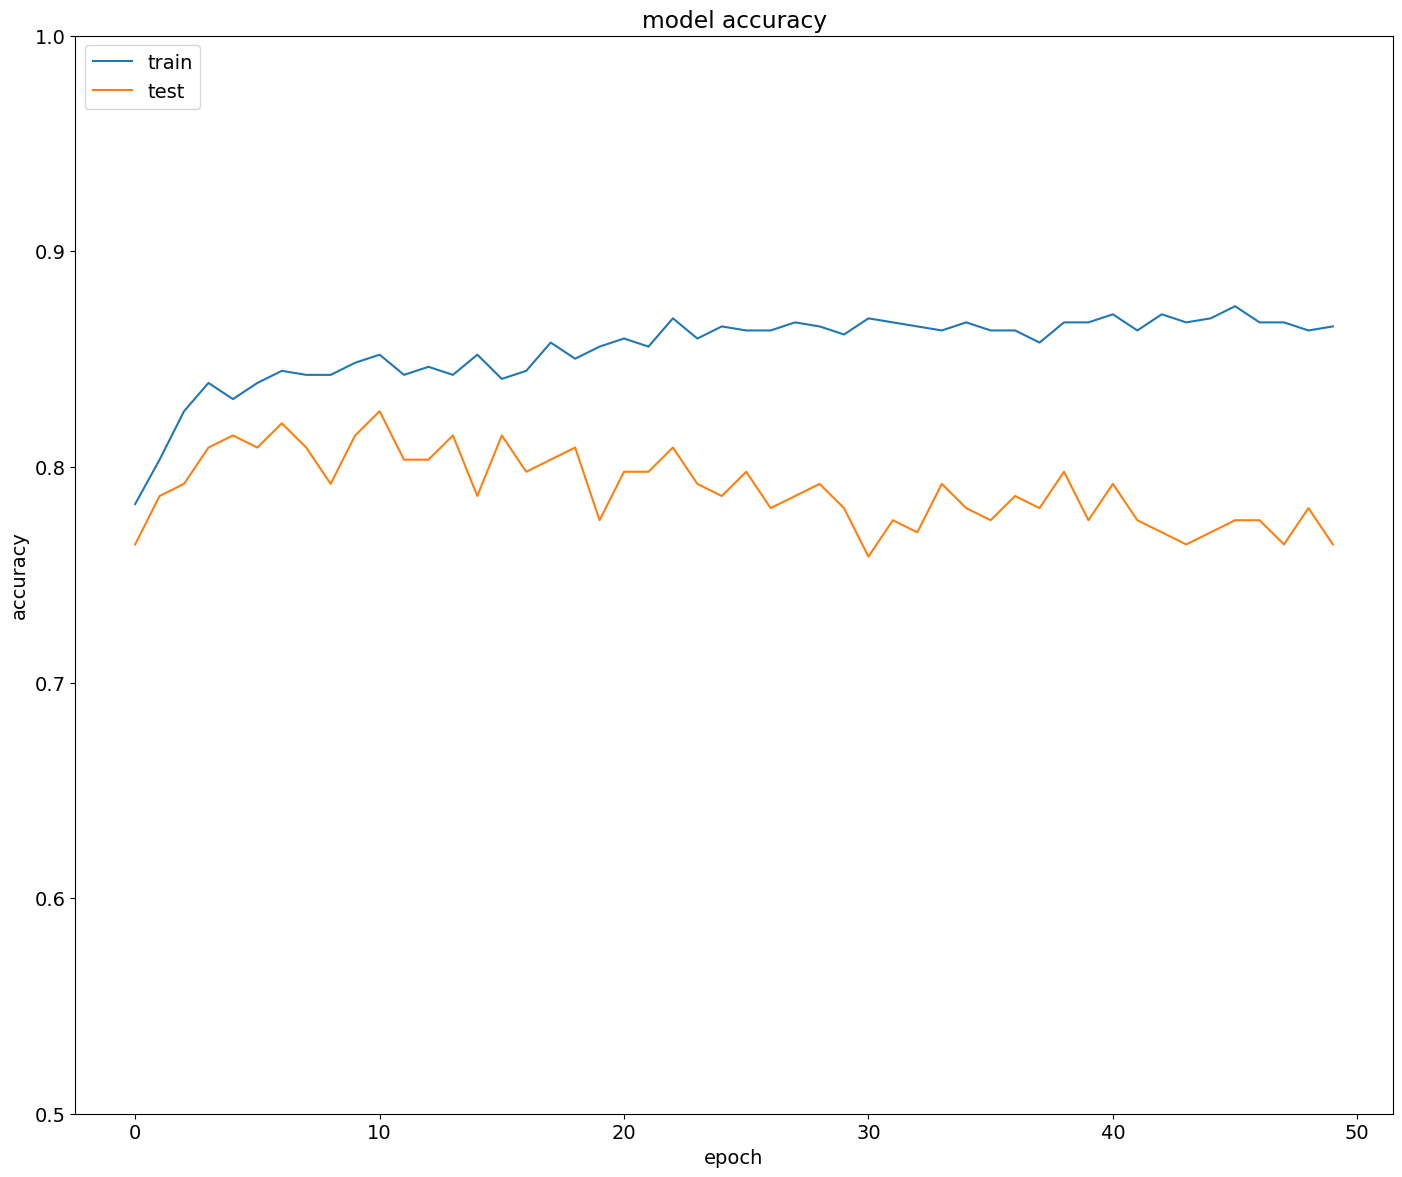

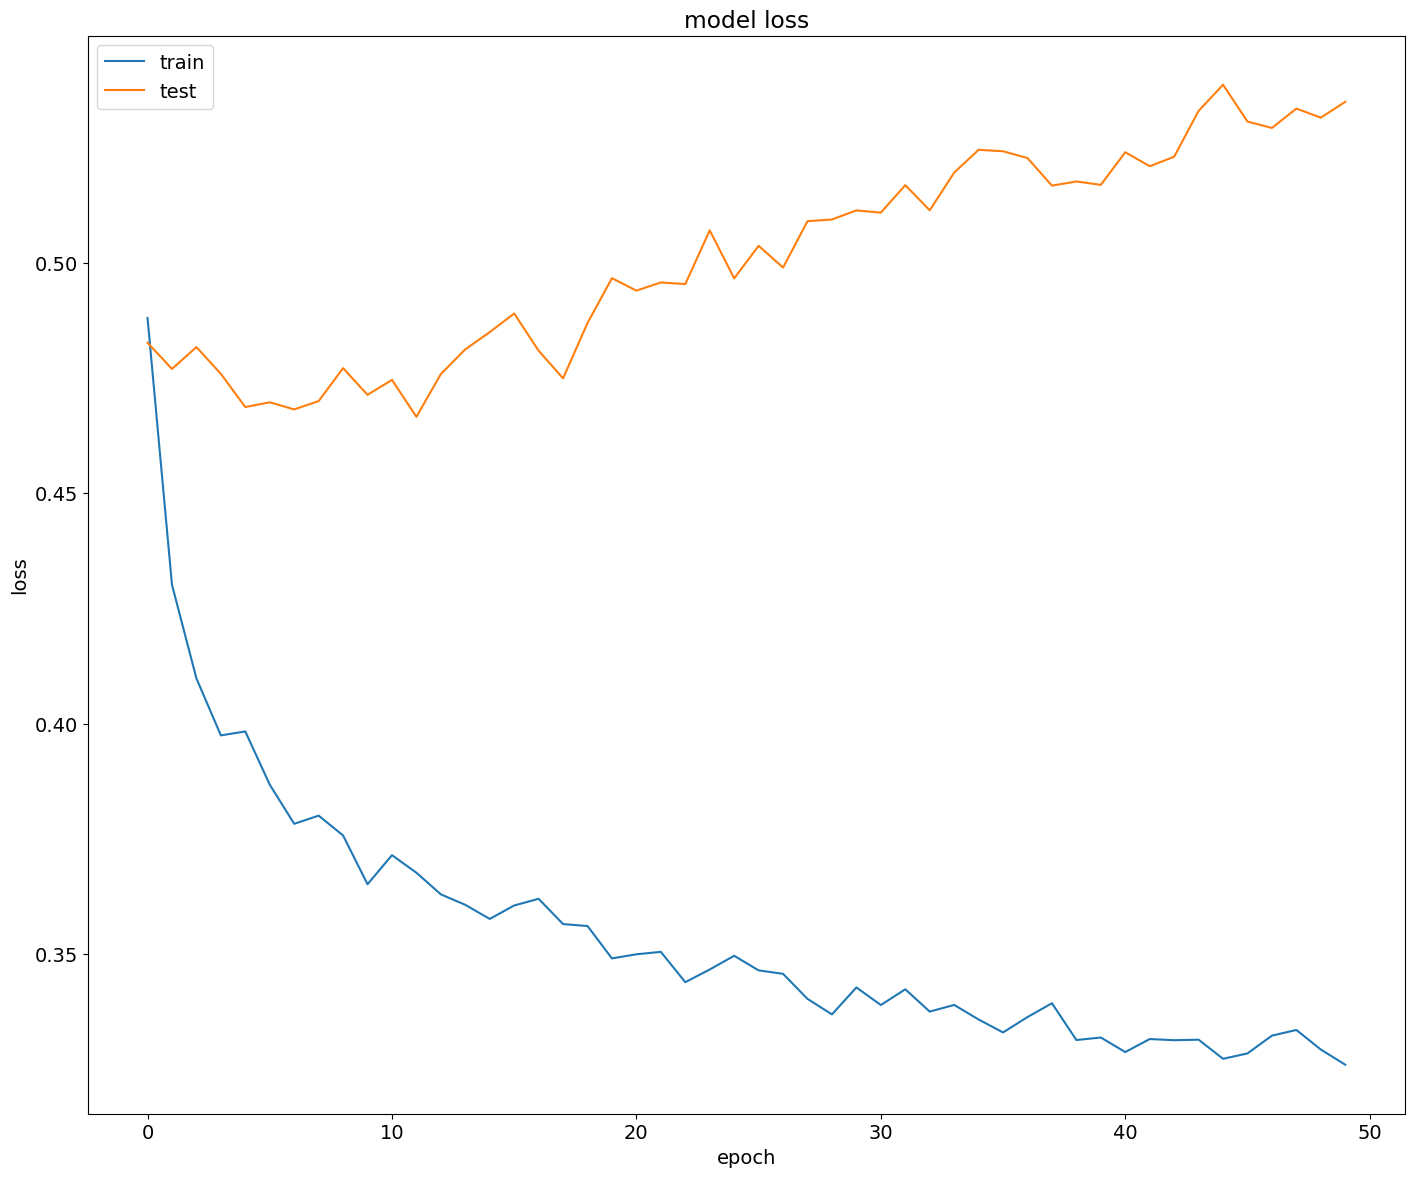

In [ ]:
plot()

Epoch 1/50
9/9 [==============================] - 1s 26ms/step - loss: 0.6552 - accuracy: 0.6180 - val_loss: 0.6664 - val_accuracy: 0.5955
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6292 - accuracy: 0.6348 - val_loss: 0.6456 - val_accuracy: 0.6124
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6090 - accuracy: 0.6760 - val_loss: 0.6321 - val_accuracy: 0.6573
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5931 - accuracy: 0.6929 - val_loss: 0.6211 - val_accuracy: 0.6685
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5790 - accuracy: 0.7191 - val_loss: 0.6121 - val_accuracy: 0.6798
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5666 - accuracy: 0.7341 - val_loss: 0.6049 - val_accuracy: 0.6966
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5564 - accuracy: 0.7360 - val_loss: 0.5990 - val_accuracy: 0.6910
Epoch 8/50
9/9 [=================

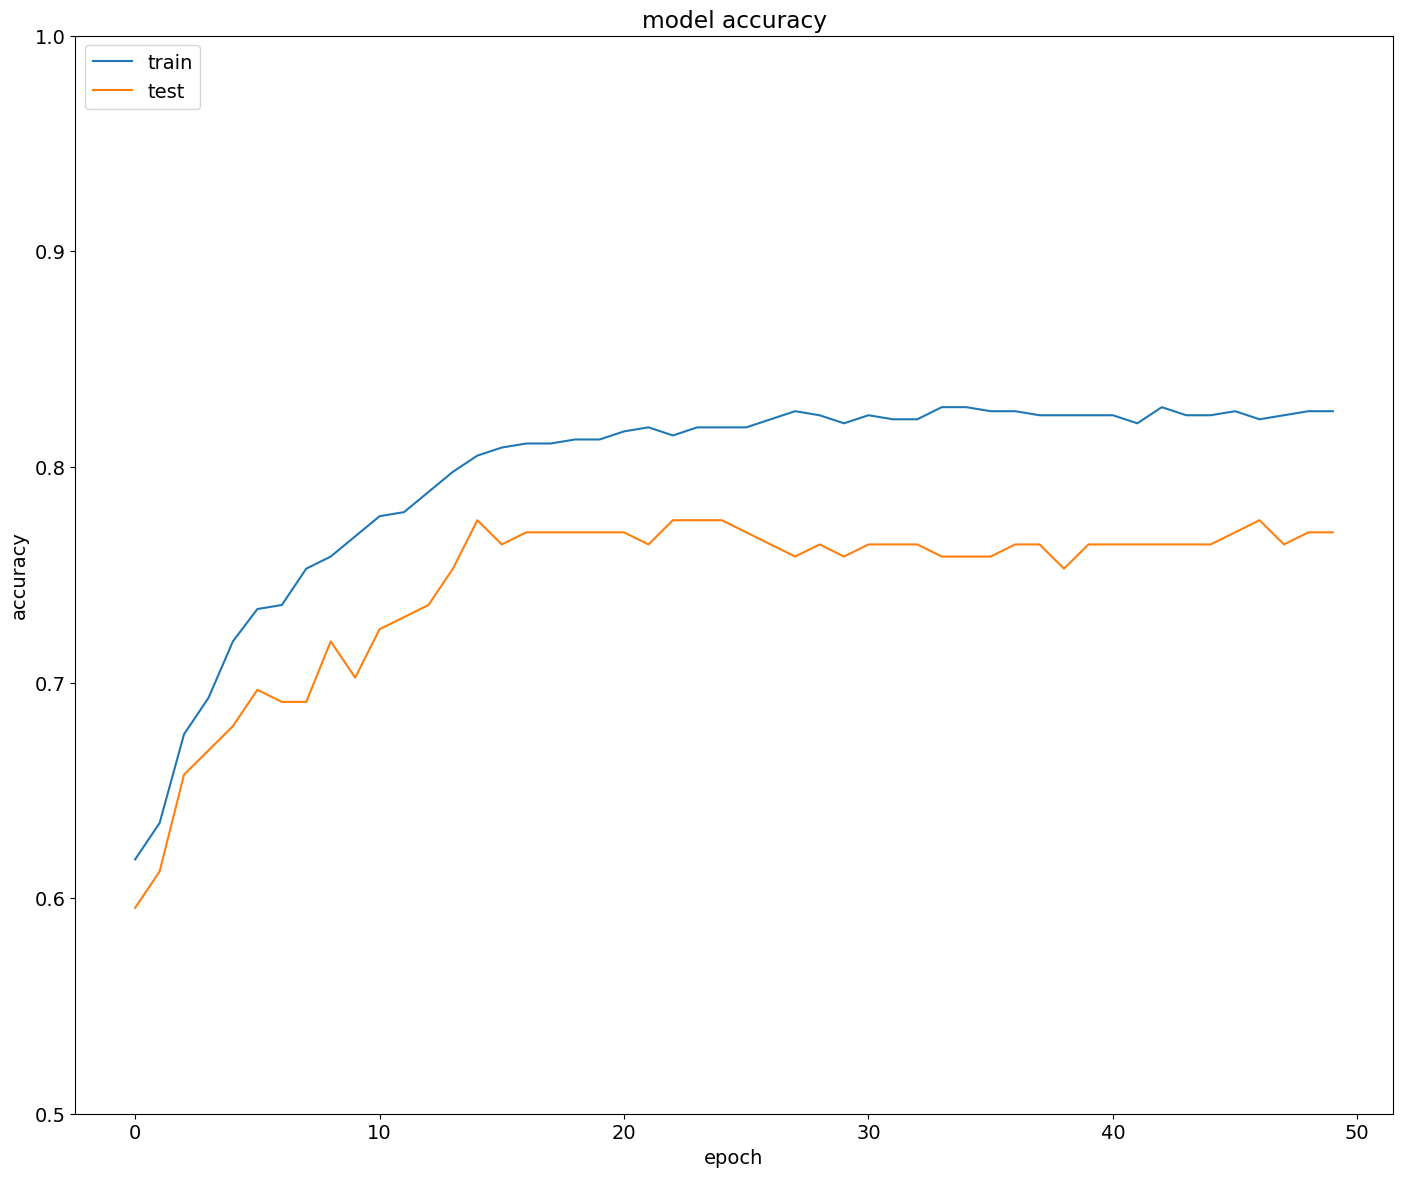

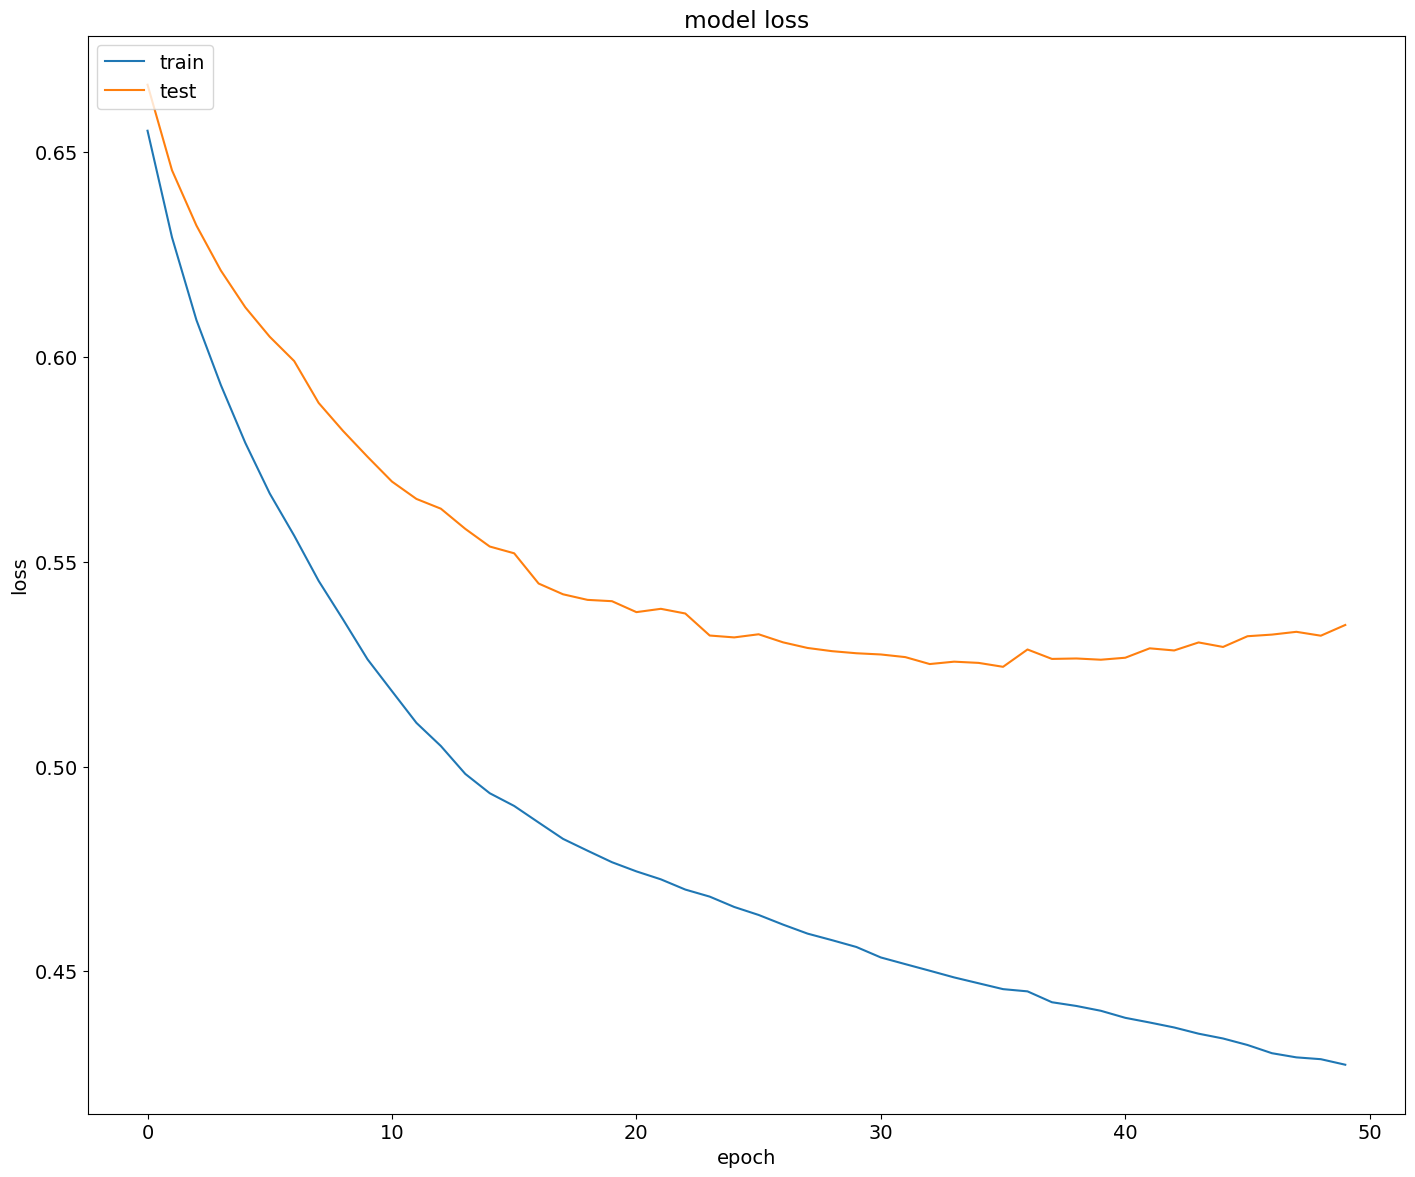

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=7, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=60, validation_data=(X_test, Y_test), verbose=1)
plot()